# Job Outcomes From Different Majors in College
Have you ever wonder?
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Which majors have higher unemployment rate?

We will try to find the answers for those questions in this project using the data collected by American Community Survey. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).<br>

The dataset consist of 173 data points providing information on gender diversity, employment rates, median salaries, etc. of college students who graduated between 2010-2012. Here are some columns in the data set:
- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

**Results:**
- On average, engineer major has highest income.
- Physical Science is interestingly in top 5 of earning and lowest rank in unemployment rate.
- Education is major with highest rate of females students. However, this major does not have good income.

In [1]:
# Read in the data set as DataFrame
import pandas as pd
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
# Overview of columns in the dataset
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [3]:
# Convert column names to lowercase
recent_grads.columns = map(str.lower, recent_grads.columns)

## Data Cleaning
Data type of columns seems to be correct. Some columns have one missing value.

In [4]:
recent_grads[recent_grads['men'].isnull()]

,rank,major_code,major,total,men,women,major_category,sharewomen,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


### Drop row with missing values
We don't have data to fill in null values for this row, it is better to just drop it.

In [5]:
recent_grads.dropna(inplace = True)

In [6]:
# confirm dropping one row only
recent_grads.shape[0]

172

## Analysis
### Do students in more popular majors make more money?
We look at major_category to determine the popular majors by calculating average enrolled students.<br>

Data in Median column show the median salary of full-time, year-round workers. We will calculate the average of this data grouped by majors to find the average earning per major.

In [7]:
# Calculate average enrolled student and earning of grouped majors
majors_earning = (recent_grads
            .groupby('major_category')[['total','median']].agg('mean'))

In [8]:
# Sort by majors' popularity
majors_earning.sort_values(
    ['total','median'], inplace = True)

In [9]:
# rename columns to be intuitive
majors_earning.rename(columns = {'total':'avg_enrolled_student',
                              'median':'avg_fulltime_salary'}, inplace = True)

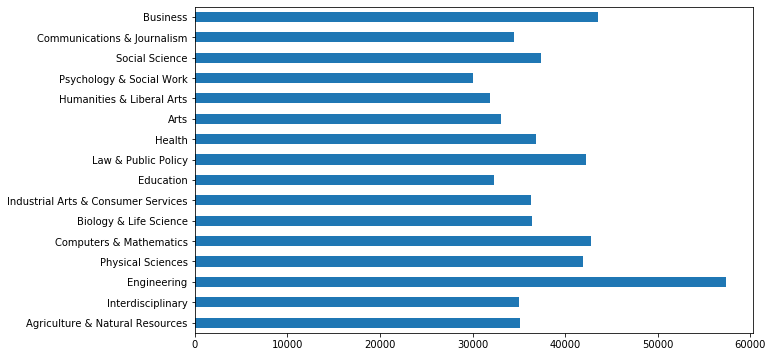

In [10]:
import matplotlib.pyplot as plt
majors_earning.plot.barh(y ='avg_fulltime_salary', legend = None,
                         figsize = (10, 6))
plt.ylabel('')
plt.show()

The majors on the y-axis is arranged from most popular (top) to least popular (bottom) by the number of students enrolled. <br>

With average of 100,182 students, Business is the most popular major. <br>

The average earning is highest with Engineering major, even though this major is at the third position bottom up on popularity.<br>

The bar chart shows that the popularity of majors doesn't have a relationship with earning.

### Do students that majored in subjects that were majority female make more money?

We will look into the sum of ShareWomen rate at major_category level.

In [11]:
# Calculate average of median earning and total number of share women
female_earning = (recent_grads
            .groupby('major_category').agg(
                total_sharewomen=('sharewomen','sum'),
                average_earning=('median','mean')))

In [12]:
female_earning.sort_values(
        ['total_sharewomen','average_earning'], inplace = True)

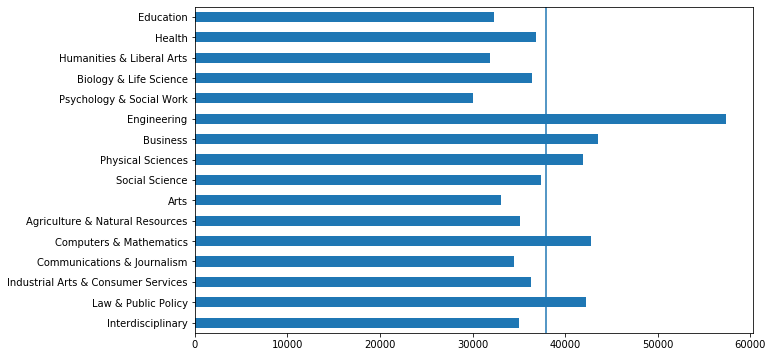

In [13]:
import numpy as np
ax = female_earning.plot.barh(y='average_earning',
                         legend = None, figsize = (10,6))
plt.ylabel('')
plt.axvline(np.mean(female_earning['average_earning']))
plt.show()

The majority of female students chose Education, Health, Humanities & Liberal Arts majors. The average of median salary for these majors are still under the average of average of all majors.

### Which majors have higher unemployment rate?
The Unemployment_rate column is for each major. We want to know the unemployment rate for each major_category.

In [14]:
# Calculate the total number of students and unemployment_rate per major_category
unemployment = (recent_grads.groupby('major_category').agg('sum')
               [['total','unemployed']])
unemployment['unemployment_rate_category'] = (unemployment['unemployed']
                                             /unemployment['total'])*100

In [15]:
unemployment

,total,unemployed,unemployment_rate_category
major_category,,,
Agriculture & Natural Resources,75620.0,3486,4.609892
Arts,357130.0,28228,7.904125
Biology & Life Science,453862.0,22854,5.035451
Business,1302376.0,79877,6.133175
Communications & Journalism,392601.0,26852,6.839514
Computers & Mathematics,299008.0,18373,6.144652
Education,559129.0,24969,4.465696
Engineering,537583.0,29817,5.546492
Health,463230.0,22213,4.795242


The unemployment_rate is organized in the order of most to least. <br>
Social Science and Art tend to have higher unemployment_rate.

### Summary

In [16]:
# Add new earning_ranking column
majors_earning['earning_rank'] = (majors_earning['avg_fulltime_salary']
                                  .rank(ascending = False))

In [17]:
# Add new female_majority_ranking column
female_earning['female_majority_rank'] = (female_earning['total_sharewomen']
                                    .rank(ascending = False))

In [18]:
# Add new unemployment_rate_ranking column
unemployment['unemployment_rate_rank'] = (unemployment
                                            ['unemployment_rate_category']
                                            .rank(ascending = False))

In [19]:
# combine new ranking columns
combine = pd.concat(
    [pd.DataFrame(majors_earning['earning_rank'], majors_earning.index),
    pd.DataFrame(female_earning['female_majority_rank'],
                             female_earning.index),
    pd.DataFrame(unemployment['unemployment_rate_rank'], 
                             unemployment.index)],
    axis = 1)
combine.sort_values('earning_rank')

,earning_rank,female_majority_rank,unemployment_rate_rank
Engineering,1.0,6.0,10.0
Business,2.0,7.0,8.0
Computers & Mathematics,3.0,12.0,7.0
Law & Public Policy,4.0,15.0,3.0
Physical Sciences,5.0,8.0,16.0
Social Science,6.0,9.0,1.0
Health,7.0,2.0,13.0
Biology & Life Science,8.0,4.0,11.0
Industrial Arts & Consumer Services,9.0,14.0,12.0
Agriculture & Natural Resources,10.0,11.0,14.0


# Conclusion
#### Earning
- Engineer is the major that makes the most money. 
- Following are Business and Computers & Mathematics

#### Majors with majority of females
- Education, Liberal Arts, Psychology are in top 5 majors with highest participant of females student, though these majors are on the bottom of earning list.
- Majors with majority of females do not have a high income. 

#### Unemployment rate
- Even though Education major doesn't get paid much, they have almost lowest unemployment rate in the list of majors.
- Physical Science has lowest unemployment rate and being listed in top 5 of earning rank. This is a promising major for anyone college student love science and want job security.